<a href="https://colab.research.google.com/github/cchiraag/ML-Projects/blob/main/RL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART-A**

## Describe in Brief

### What is dimensionality reduction?

**Ans:** The Dimensionality Reduction refers to the process which is used to reduce the number of input variables/dimensions(n) in a given dataset and make them equal to k-dimensions (where k<<n). 

### Why is dimensionality reduction required?

**Ans:** Dimensionality Reduction is required due to the following reasons:--


1.   The memory space required becomes less as the no. of dimensions decreases.
2.   Less dimensions results in less computational time.
3.   Dimensionality Reduction is very helpful for those algorithms, which requires lesser no. of dimensions for their execution.
4.   It is also used to remove or reduce multicollinearity, by removing those input variables which are higly correlated.
5.   It helps in data visualization, as with higher no. of variables the data visualization becomes difficult.


## Implementation of Dimensionality Reduction algorithms

### Missing Value Ratio
A dataset may contain the missing values. So, we have two options: either drop the values or impute the values.

We prefer to drop the values, when the percentage of missing values is higher. Therefore, we set a threshold value after which we will the drop the missing values. 

In [ ]:
# import required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# read the data
# Big Mart Sales III datasets
train=pd.read_csv("fashion-mnist_train.csv")

Let for this dataset:

1. **label** is our dependent variable, and
2. all other columns are our independent variables.

In [ ]:
# checking the percentage of missing values in each variable 
train.isnull().sum()/len(train)*100

label       0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 785, dtype: float64

As we can see the missing values are not present in the dataset, there is no need for the imputation of missing values.

### Low Variance Filter
We will filter out low variance variables from the dataset, as they won't be of any use in determining the pattern or the relationships among the variables. Thus, their absence would not affect the target variable.

So, we will find the variance of each variable, and then drop those variables which will have least variances, as compared to other variables.

In [ ]:
train.var()

label          8.250138
pixel1         0.008966
pixel2         0.073447
pixel3         1.494076
pixel4         6.016577
               ...     
pixel780    2038.467256
pixel781     877.039858
pixel782     302.678284
pixel783      87.552700
pixel784       4.519324
Length: 785, dtype: float64

In [ ]:
numeric = train
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=50:   #setting the threshold as 50%
       variable.append(numeric[i])
print(*variable)

pixel7 pixel8 pixel9 pixel10 pixel11 pixel12 pixel13 pixel14 pixel15 pixel16 pixel17 pixel18 pixel19 pixel20 pixel21 pixel22 pixel23 pixel24 pixel33 pixel34 pixel35 pixel36 pixel37 pixel38 pixel39 pixel40 pixel41 pixel42 pixel43 pixel44 pixel45 pixel46 pixel47 pixel48 pixel49 pixel50 pixel51 pixel52 pixel53 pixel54 pixel55 pixel60 pixel61 pixel62 pixel63 pixel64 pixel65 pixel66 pixel67 pixel68 pixel69 pixel70 pixel71 pixel72 pixel73 pixel74 pixel75 pixel76 pixel77 pixel78 pixel79 pixel80 pixel81 pixel82 pixel83 pixel87 pixel88 pixel89 pixel90 pixel91 pixel92 pixel93 pixel94 pixel95 pixel96 pixel97 pixel98 pixel99 pixel100 pixel101 pixel102 pixel103 pixel104 pixel105 pixel106 pixel107 pixel108 pixel109 pixel110 pixel111 pixel114 pixel115 pixel116 pixel117 pixel118 pixel119 pixel120 pixel121 pixel122 pixel123 pixel124 pixel125 pixel126 pixel127 pixel128 pixel129 pixel130 pixel131 pixel132 pixel133 pixel134 pixel135 pixel136 pixel137 pixel138 pixel139 pixel140 pixel142 pixel143 pixel144 p

The above will return the list of variables having the threshold variance greater than 50% or 0.50.

### High Correlation Filter
High correlation indicates that the variables are highly dependent on each other and thus, carries same type of information trends. These correlated variables degrades the performance of certain models. This makes it important to drop the high correlated variables.

So, we will find the correlation of each independent variable on each other, and filter out one of those variables, whose correlation coefficients exceeds a threshold value.

But, in general, we must keep those variables which show moderate/high correlation with the target variable.

In [ ]:
df=train.drop('label', 1) 
df.corr()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
pixel1,1.000000,0.297899,0.067550,0.046608,0.026630,0.026172,0.012095,0.012218,0.009637,0.000053,-0.001539,-0.001706,-0.003408,-0.004327,-0.004091,-0.004538,-0.003630,0.000359,0.000233,0.003825,0.009263,0.009629,0.013325,0.010738,0.014229,0.020924,0.033467,0.068284,0.174315,0.069358,0.035210,0.019391,0.015975,0.019228,0.015485,0.008701,0.007047,0.001935,0.001935,0.002625,...,-0.000937,-0.000943,0.000916,0.002869,0.005465,0.003384,-0.001032,-0.001892,0.000124,0.008300,0.013673,0.028217,0.079727,0.040084,0.021226,0.000800,-0.000404,-0.002468,0.000229,0.004006,0.003137,0.000512,-0.000009,-0.000972,-0.002624,-0.001192,0.000013,-0.001553,-0.000988,-0.000829,-0.000642,0.004625,0.004605,0.000969,-0.002306,-0.002441,-0.000108,0.008765,0.026389,0.041582
pixel2,0.297899,1.000000,0.575029,0.138710,0.054354,0.033185,0.022763,0.017127,0.016809,0.010904,0.001093,-0.004771,-0.009056,-0.009805,-0.009818,-0.009123,-0.005711,0.000901,0.005705,0.011686,0.012376,0.013169,0.018455,0.018646,0.022279,0.023378,0.056003,0.072982,0.053172,0.250093,0.295474,0.122013,0.062288,0.038411,0.030798,0.023628,0.017484,0.010037,0.002512,-0.002752,...,0.007587,0.007803,0.011101,0.015181,0.019891,0.014801,0.003668,0.002738,0.007653,0.019849,0.026739,0.011891,0.026220,0.069062,0.043791,0.016090,0.011048,0.004598,0.011083,0.019441,0.014417,0.011368,0.007356,0.003313,0.003722,0.005585,0.006584,0.001384,-0.002687,-0.002457,0.000492,0.004857,0.006811,0.002083,-0.004431,-0.002342,0.004273,0.014218,0.021297,0.022162
pixel3,0.067550,0.575029,1.000000,0.387466,0.118135,0.087300,0.060927,0.035920,0.029712,0.021526,0.013910,0.008741,-0.000241,-0.003637,-0.003393,-0.002595,0.003548,0.011294,0.015110,0.022888,0.028651,0.035774,0.046564,0.063943,0.086459,0.088027,0.026804,0.023971,0.011710,0.109548,0.492300,0.257715,0.129912,0.065453,0.049379,0.040335,0.033733,0.024664,0.014226,0.008738,...,0.015436,0.013977,0.016125,0.022081,0.028490,0.018108,0.002189,0.001903,0.006953,0.012469,0.009524,0.006071,0.007811,0.023482,0.022493,0.020237,0.013674,0.008991,0.011040,0.029225,0.028937,0.023584,0.017934,0.010489,0.012451,0.016035,0.016512,0.010369,0.005020,0.005930,0.010131,0.016743,0.018358,0.006171,-0.003825,-0.001501,0.006860,0.013152,0.009946,0.015657
pixel4,0.046608,0.138710,0.387466,1.000000,0.573172,0.325684,0.242954,0.140955,0.085253,0.051090,0.024939,0.015824,0.008635,0.005675,0.006265,0.005179,0.010275,0.019666,0.031051,0.057427,0.090017,0.131338,0.182904,0.236695,0.313833,0.235375,0.045772,0.006049,0.010717,0.035056,0.442038,0.687574,0.430277,0.216119,0.123876,0.082804,0.057410,0.040183,0.024800,0.017502,...,0.012483,0.012839,0.016588,0.026144,0.034462,0.028697,0.021840,0.019190,0.022043,0.012583,-0.000146,0.001631,0.003496,0.007653,0.018884,0.030151,0.024329,0.023178,0.020993,0.032810,0.031504,0.024483,0.015827,0.008769,0.008769,0.014395,0.016365,0.010266,0.002809,0.004791,0.009684,0.018697,0.023373,0.016718,0.009681,0.010095,0.023942,0.012392,0.003075,0.008423
pixel5,0.026630,0.054354,0.118135,0.573172,1.000000,0.692891,0.423577,0.230564,0.136311,0.075599,0.035570,0.020526,0.015787,0.016198,0.017713,0.011653,0.013646,0.025918,0.043240,0.087196,0.151014,0.227373,0.323853,0.355558,0.331787,0.146442,0.040084,0.003427,0.006152,0.026354,0.184695,0.590217,0.682275,0.375071,0.192633,0.121428,0.077064,0.049404,0.028192,

As we can see from the above correlation matrix, that there are some variables whose correlation coefficients are extremely high. So, there is a need to omit those variables that are correlated above a threshold value (say 0.8).

In [ ]:
test = df
correlated_features = set()
correlation_matrix = test.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:      # threshold correlation coefficient
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

test.drop(labels=correlated_features, axis=1, inplace=True)
test.corr()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel38,pixel39,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,...,pixel562,pixel588,pixel589,pixel590,pixel617,pixel618,pixel644,pixel645,pixel646,pixel672,pixel673,pixel674,pixel675,pixel700,pixel701,pixel702,pixel703,pixel727,pixel728,pixel729,pixel730,pixel731,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel777,pixel778,pixel780,pixel781,pixel782,pixel783,pixel784
pixel1,1.000000,0.297899,0.067550,0.046608,0.026630,0.026172,0.012095,0.012218,0.009637,0.000053,-0.001539,-0.001706,-0.003408,-0.003630,0.000359,0.000233,0.003825,0.009263,0.009629,0.013325,0.010738,0.014229,0.020924,0.033467,0.068284,0.174315,0.035210,0.019391,0.015975,0.019228,0.015485,0.008701,0.001935,0.001935,0.005473,0.008210,0.008955,0.012127,0.011958,0.011627,...,0.000503,0.000879,0.001737,0.002151,0.002055,0.003333,0.006780,0.004121,0.004498,0.009652,0.008758,0.006720,0.005369,0.011949,0.012153,0.010140,0.007456,0.008924,0.017645,0.018746,0.015649,0.011150,0.013673,0.028217,0.079727,0.040084,0.021226,0.000800,-0.000404,-0.002468,0.000229,0.004006,0.003137,0.004605,0.000969,-0.002441,-0.000108,0.008765,0.026389,0.041582
pixel2,0.297899,1.000000,0.575029,0.138710,0.054354,0.033185,0.022763,0.017127,0.016809,0.010904,0.001093,-0.004771,-0.009056,-0.005711,0.000901,0.005705,0.011686,0.012376,0.013169,0.018455,0.018646,0.022279,0.023378,0.056003,0.072982,0.053172,0.295474,0.122013,0.062288,0.038411,0.030798,0.023628,0.010037,0.002512,0.012933,0.018044,0.019105,0.018654,0.014419,0.013214,...,0.007179,-0.001744,-0.003090,0.009787,-0.000467,0.011199,0.001568,0.008219,0.010942,0.004732,0.013903,0.014792,0.019368,0.007235,0.032866,0.021553,0.012137,0.018812,0.007881,0.031904,0.040024,0.024984,0.026739,0.011891,0.026220,0.069062,0.043791,0.016090,0.011048,0.004598,0.011083,0.019441,0.014417,0.006811,0.002083,-0.002342,0.004273,0.014218,0.021297,0.022162
pixel3,0.067550,0.575029,1.000000,0.387466,0.118135,0.087300,0.060927,0.035920,0.029712,0.021526,0.013910,0.008741,-0.000241,0.003548,0.011294,0.015110,0.022888,0.028651,0.035774,0.046564,0.063943,0.086459,0.088027,0.026804,0.023971,0.011710,0.492300,0.257715,0.129912,0.065453,0.049379,0.040335,0.024664,0.014226,0.026534,0.033230,0.036124,0.037223,0.041158,0.052454,...,0.003773,-0.004126,0.002872,0.005217,0.003289,0.001499,-0.000336,0.002995,0.001643,-0.001541,0.007855,0.006856,0.012796,-0.000145,0.011040,0.007106,0.008727,0.008131,0.002140,0.007772,0.011841,0.014771,0.009524,0.006071,0.007811,0.023482,0.022493,0.020237,0.013674,0.008991,0.011040,0.029225,0.028937,0.018358,0.006171,-0.001501,0.006860,0.013152,0.009946,0.015657
pixel4,0.046608,0.138710,0.387466,1.000000,0.573172,0.325684,0.242954,0.140955,0.085253,0.051090,0.024939,0.015824,0.008635,0.010275,0.019666,0.031051,0.057427,0.090017,0.131338,0.182904,0.236695,0.313833,0.235375,0.045772,0.006049,0.010717,0.442038,0.687574,0.430277,0.216119,0.123876,0.082804,0.040183,0.024800,0.046028,0.065190,0.091088,0.119056,0.150939,0.211952,...,-0.004106,-0.004826,-0.005124,-0.007219,-0.005187,-0.005465,-0.001724,-0.005219,-0.000812,-0.002127,-0.002351,0.002067,0.014905,-0.001399,-0.001988,0.007039,0.020822,0.000521,-0.001696,-0.001369,0.013341,0.027312,-0.000146,0.001631,0.003496,0.007653,0.018884,0.030151,0.024329,0.023178,0.020993,0.032810,0.031504,0.023373,0.016718,0.010095,0.023942,0.012392,0.003075,0.008423
pixel5,0.026630,0.054354,0.118135,0.573172,1.000000,0.692891,0.423577,0.230564,0.136311,0.075599,0.035570,0.020526,0.015787,0.013646,0.025918,0.043240,0.087196,0.151014,0.227373,0.323853,0.355558,0.331787,0.146442,0.040084,0.003427,0.006152,0.184695,0.590217,0.682275,0.375071,0.192633,0.121428,0.049404,0.028192,0.057604,0.086681,0.130106,0.184959,0.228163,0.245

Now, we can see in the above code all the variables are too much correlated to each other, and even the dimensionality have also been reduced.

### Random Forest
It is one of the most used extensively used dimensionality reduction algorithm, which helps us to select the smaller subset of dimensions.

This algorithm works only with numeric variables, thus we need to drop the string columns, even the numeric variables containing a unique ID, as they are of importance in determining the target variable.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

Now, after fitting our model, we will find our most important input variables in the form of a graph plot.

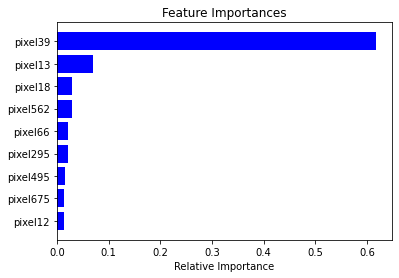

In [ ]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Thus, it can be used for dimensionality reduction, as we can handpick some of the important variables only. 

Alternatively, we can use the code below as it selects the input variables according to their importance.

In [ ]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.label)

### Backward Feature Elimination
This process is performed in following ways:--

1. We will start by taking all the variables of our dataset, into the model.
2. Then we will calculate the model's performance.
3. Now, we will drop each variable from our model and calculate the model performance sequentially.
4. Then, we will check for those variables whose removal have least/not affected the performance of the model.
5. And we will drop that variable from our model.
6. Repeat the whole process again and again, until no variable can be dropped.

This method is widely used for Linear and Logistic Regression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10) # Recursive Features Elimination
rfe = rfe.fit_transform(df, train.label)
print(rfe)

[[ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  0  0]]


### Forward Feature Selection
This process is performed in following steps:-

1. We will start by taking one variable, and train the model separately for each variable.
2. The variable with highest performance will selected as the first variable.
3. Then, we will take two variables, and repeat the process for the second variable.
4. Repeat the process, until the model shows no improvement further on increasing the number of variables/features.

In [ ]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.label)

It will return the F-value and its coressponding p-value.

If the F-value for a variable is greater than a threshold value, then we will select that variable.

In [ ]:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:                  # threshold f-value
       variable.append(df.columns[i])

print(*variable)

pixel7 pixel8 pixel9 pixel10 pixel11 pixel12 pixel13 pixel17 pixel18 pixel19 pixel20 pixel21 pixel22 pixel23 pixel24 pixel25 pixel26 pixel27 pixel28 pixel34 pixel35 pixel36 pixel38 pixel39 pixel48 pixel49 pixel50 pixel51 pixel52 pixel53 pixel54 pixel55 pixel56 pixel58 pixel59 pixel60 pixel61 pixel66 pixel76 pixel79 pixel80 pixel81 pixel82 pixel83 pixel84 pixel85 pixel86 pixel87 pixel88 pixel109 pixel110 pixel111 pixel112 pixel113 pixel114 pixel115 pixel138 pixel139 pixel140 pixel141 pixel142 pixel143 pixel167 pixel168 pixel169 pixel170 pixel171 pixel195 pixel196 pixel197 pixel224 pixel225 pixel252 pixel280 pixel295 pixel308 pixel336 pixel364 pixel421 pixel422 pixel449 pixel450 pixel477 pixel478 pixel487 pixel492 pixel495 pixel504 pixel505 pixel506 pixel507 pixel515 pixel520 pixel521 pixel532 pixel533 pixel534 pixel543 pixel560 pixel561 pixel562 pixel588 pixel589 pixel590 pixel617 pixel618 pixel644 pixel645 pixel646 pixel672 pixel673 pixel674 pixel675 pixel700 pixel701 pixel702 pixel703

### Singular Value Decomposition
The SVD is used for the decomposition of the variables of original dataset, into smaller subset of variables/matrices, resulting in dimensionality reduction. The matrices are found by the certain concepts of linear algebra (i.e. eigenvalues, eigenvectors, etc).

In [ ]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df.values)

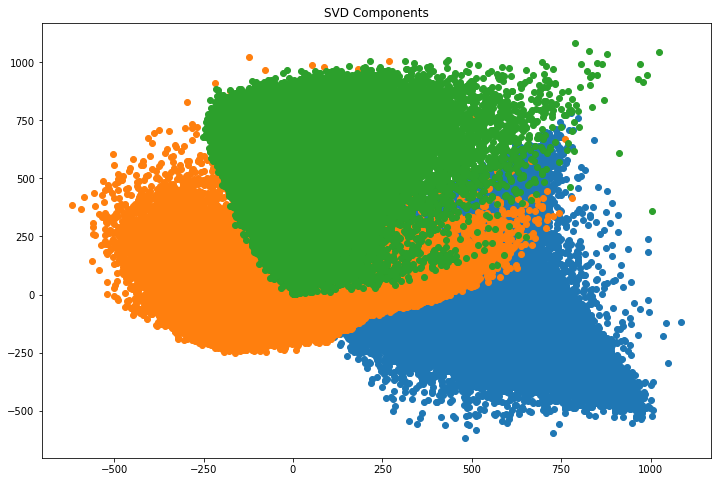

In [ ]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

### Principal Component Analysis
It is the technique which is used for the extraction of new variables from the large set of original variables. These new variables are called Principal Components (PCs), which have following properties:

1. The PCs are the linear combination of original dataset variables.
2. The first PC is extracted such that it shows maximum variance in the dataset.
3. Then second PC shows 2nd highest variance, third PC shows 3rd highest, and so on.
4. These PCs are independent of each other i.e. are not correlated i.e. are orthogonal to each other.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df.values)

Here, $n\_components$ attribute is used to define the number of principal components we want. The given below is the code for the visualization of the working of principal components:

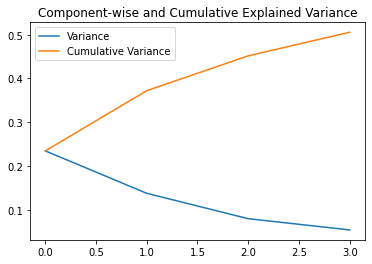

In [ ]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.legend(['Variance','Cumulative Variance'])

From the above data visualization, we can see that the variance is maximum for the first PC, but decreases with increase in PCs.

### Linear Discriminant Analysis
LDA is a bit similar to PCA, but it focuses on the computation of the directions (called linear discriminants) that will represent the axes that maximize the separation between multiple classes in a dataset.

It takes place by the following steps:-

1. Compute the d-dimensional mean vectors for different classes of the dataset.

2. Find its scatter matrices.

3. Calculate the eigenvalues $(e_1,e_2,...,e_d)$ and corresponding eigenvectors $(λ_1,λ_2,...,λ_d)$ for each scatter matrices.

4. Sort the eigenvectors in decreasing order of eigenvalues to form a $d×k$ matrix $W$, in which every column of $W$ represents an eigenvector.

5. Now, we will use this $d×k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: $Y=X×W$

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=3)
X_lda_sklearn = sklearn_lda.fit_transform(df, train.label)
X_lda_sklearn

array([[ 3.42316463, -0.3020493 , -1.47532769],
       [ 3.00098873, -1.15191416,  0.61084471],
       [-2.17240025,  1.01237014,  0.69845499],
       ...,
       [ 0.80144911,  0.48429027, -0.20946238],
       [ 2.59844678, -0.25391927,  0.80918358],
       [ 3.65872895, -0.11555439, -3.69790919]])

# **PART-B**

## Feature Extraction in Text
Performing feature extraction for texts are difficult and messy, because the machine learning algorithms prefer a fixed-length inputs and outputs, while the texts can be of any length.

The machine learning cannot use the text directly for computation. The text is needed to be first converted into numbers or more specifically, vector of numbers.

In the language processing, through the derived vector of numbers, we can get the linguistic properties of the text.

## Manual Tokenization
In this process, we will manually tokenize the text (i.e. split the sentences or paragraphs to words, remove punctuations, etc.).

### Load Data
Firstly, we have to load the text file from which we want to extract the features, and make it readable.

In [ ]:
# load text
filename = 'pg13437.txt'
file = open(filename, 'rt')
base_text = file.read()
file.close()

### Split by Whitespace
After reading the file, we need to tokenize the text by splitting it through whitespaces (i.e. (space), new lines, tabs, etc). 

It can be done by $split()$ function, which splits the given strings into a list of splitted strings.

In [ ]:
# split into words by white space
words = base_text.split()
print(words[:10])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories,', 'by']


Alternatively, if we want to split the text on the basis of alphanumeric characters (i.e. A-Z, a-z, 0-9, etc), then the regex model can be used.

In [ ]:
import re
# split based on words only
words = re.split(r'\W+', base_text)
print(words[:100])

['', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', '11', '2004', 'EBook', '13437', 'Last', 'Updated', 'July', '27', '2015', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'by', 'David', 'Starner', 'Keith', 'M', 'Eckrich', 'and', 'the', 'Project']


### Remove Punctuation
Next, we often need to remove the punctuations in the tokens like:-- 

< > , . ( ) [ { } ] etc...

Python provides a library which contains all the punctuation characters, that is:

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


So, to remove the punctuations from the tokens of text:-

In [ ]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:100])

['', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Best', 'Russian', 'Short', 'Stories', 'by', 'Various', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'Title', 'Best', 'Russian', 'Short', 'Stories', 'Author', 'Various', 'Release', 'Date', 'September', '11', '2004', 'EBook', '13437', 'Last', 'Updated', 'July', '27', '2015', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'BEST', 'RUSSIAN', 'SHORT', 'STORIES', 'Produced', 'by', 'David', 'Starner', 'Keith', 'M', 'Eckrich', 'and', 'the', 'Project']


Sometimes, we have some non-printable characters in our text file, so to remove them also, we have:--

In [ ]:
re_print = re.compile('[^%s]' % re.escape(string.printable))
result = [re_print.sub('', w) for w in words]

### Normalizing Case
We need to convert the all types of cases present our text to a single case, which can be done by $lower()$ function. But, it makes us lose some of the distinctions present in the text.

## Tokenization and Cleaning with NLTK
NLTK (Natural Language Toolkit) is a Python library, which is used generally for the feature extraction and analysis of text. It provides better tools for the working of the basic operations like cleaning text, etc. so that it can be used for further machine learning process.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Lets demonstrate it with the small pipeline of text preparation:--

1.   Load the raw text.
2.   Split into tokens.
3.   Convert to lowercase.
4.   Remove punctuation from each token.
5.   Filter out remaining tokens that are not alphabetic.
6.   Filter out tokens that are stop words.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# load data
filename = 'pg13437.txt'
file = open(filename, 'rt')
base_text = file.read()
file.close()
# split into words
tokens = word_tokenize(base_text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stories', 'various', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergnet', 'title', 'best', 'russian', 'short', 'stories', 'author', 'various', 'release', 'date', 'september', 'ebook', 'last', 'updated', 'july', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'best', 'russian', 'short', 'stories', 'produced', 'david', 'starner', 'keith', 'eckrich', 'project', 'gutenberg', 'online', 'distributed', 'proofreaders', 'team', 'illustration', 'anton', 'p', 'chekhov', 'russia', 'greatest', 'shortstory', 'writer', 'best', 'russian', 'short', 'stories', 'compiled', 'edited', 'thomas', 'seltzer', 'contents', 'introduction', 'queen', 'spades', 'pushkin', 'cloak', 'nv', 'gogol', 'district', 'doctor', 'turgenev', 'christmas', 'tree', 'wedding', 'fm', 'dostoy

## Word Counts with CountVectorizer
The $CountVectorizer$ function is used as both for tokenization of text documents, and build vocabulary from those tokens/words. But, it is also used to encode the given text documents.

It is used in the following steps:--

1. Call the $CountVectorizer()$ function, and return it to a variable.
2. Use $fit()$ function over the variable, in order to learn from the vocabulary of words from the list of documents.
3. Then, call $transform()$ function to encode the document as a vector.
4. Finally, to view the vector-encoded form, we can use $toarray()$ function for better understanding.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# load data
filename = 'pg13437.txt'
file = open(filename, 'rt')
base_text = file.read()
file.close()
# convert whole text to list of texts
text = base_text.split("\n")
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 8170, 'project': 6243, 'gutenberg': 3742, 'ebook': 2628, 'of': 5518, 'best': 880, 'russian': 6921, 'short': 7267, 'stories': 7785, 'by': 1179, 'various': 8709, 'this': 8213, 'is': 4430, 'for': 3303, 'use': 8660, 'anyone': 445, 'anywhere': 449, 'at': 618, 'no': 5406, 'cost': 1815, 'and': 396, 'with': 9073, 'almost': 344, 'restrictions': 6735, 'whatsoever': 8969, 'you': 9184, 'may': 5013, 'copy': 1790, 'it': 4438, 'give': 3550, 'away': 690, 'or': 5588, 're': 6461, 'under': 8532, 'terms': 8148, 'license': 4739, 'included': 4195, 'online': 5562, 'www': 9159, 'net': 5371, 'title': 8293, 'author': 666, 'release': 6599, 'date': 2030, 'september': 7143, '11': 2, '2004': 19, '13437': 5, 'last': 4655, 'updated': 8647, 'july': 4512, '27': 22, '2015': 20, 'language': 4641, 'english': 2771, 'start': 7705, 'produced': 6222, 'david': 2033, 'starner': 7702, 'keith': 4537, 'eckrich': 2632, 'distributed': 2410, 'proofreaders': 6260, 'team': 8108, 'illustration': 4108, 'anton': 438, 'chekhov': 13

Here, $vocabulary\_$ attribute is used to display that which word is encoded to which number.

## TF(Term Frequency) - IDF(Inverse Document Frequency)
**TF (Term Frequency)** is used to measure the frequency of each of the word in whole document.

**Formula**:-- $TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)$

But the TF gives each word equal importance, even to the words like is, am, are, of, a, the, etc. which appears a lot of times in the document but have little or no importance. Therefore, for that purpose IDF came into picture.

**IDF (Inverse Document Frequency)** is used to measure the importance of that word in whole document. 

It downscales the words which are most frequent in the document.

**Formula**:-- $IDF(t) = log_e(Total number of documents / Number of documents with term t in it)$

## Word Frequencies with Tfidf Vectorizer
The $TfidfVectorizer$ is used to tokenize the document, and build the vocabulary, allows us to encode the documents (same as that of $CountVectorizer$). But, it also used to return the inverse document frequency weights for each of the word present in the document.

Given below is the code for the same:--

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# load data
filename = 'pg13437.txt'
file = open(filename, 'rt')
base_text = file.read()
file.close()
# convert whole text to list of texts
text = base_text.split("\n")
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 8170, 'project': 6243, 'gutenberg': 3742, 'ebook': 2628, 'of': 5518, 'best': 880, 'russian': 6921, 'short': 7267, 'stories': 7785, 'by': 1179, 'various': 8709, 'this': 8213, 'is': 4430, 'for': 3303, 'use': 8660, 'anyone': 445, 'anywhere': 449, 'at': 618, 'no': 5406, 'cost': 1815, 'and': 396, 'with': 9073, 'almost': 344, 'restrictions': 6735, 'whatsoever': 8969, 'you': 9184, 'may': 5013, 'copy': 1790, 'it': 4438, 'give': 3550, 'away': 690, 'or': 5588, 're': 6461, 'under': 8532, 'terms': 8148, 'license': 4739, 'included': 4195, 'online': 5562, 'www': 9159, 'net': 5371, 'title': 8293, 'author': 666, 'release': 6599, 'date': 2030, 'september': 7143, '11': 2, '2004': 19, '13437': 5, 'last': 4655, 'updated': 8647, 'july': 4512, '27': 22, '2015': 20, 'language': 4641, 'english': 2771, 'start': 7705, 'produced': 6222, 'david': 2033, 'starner': 7702, 'keith': 4537, 'eckrich': 2632, 'distributed': 2410, 'proofreaders': 6260, 'team': 8108, 'illustration': 4108, 'anton': 438, 'chekhov': 13

Here, $idf\_$ attribute is used to find the IDF for each of the word (in sequence of the words in text file) present in the document, which is shown in the second line of code.

## The Bag-of-Word Model
The Bag-of-Model is a way of representation of text data/document while modelling the text with machine learning algorithms. It is used to describe the occurrence of each word in the text document.

It helps in resolving problems arising in the fields of language modelling and document classification.

It involves the following steps:--
1. Collect Data
2. Design the Vocabulary
3. Create document vectors

The code for the same is given below:--

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# creating the bag-of-words model
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(base_text)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])